In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# K-Nearest Neighbors

A $k$-nearest neighbors classifier labels a new sample according to the majority vote of the nearest $k$-training samples. Since $k$ is the only model parameter, then this choice determines the effectiveness of the classifier.

In [2]:
class kNN:
    def __init__(self, k):
        self.k = k # Number of neighbors to be chosen
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        return None
    
    def predict(self, X_test):
        # Predicts each row in the test data
        y_test_predict = np.array([self.__predict_per_point(X_test_i)[0] for X_test_i in X_test])
        
        # Gets the list of votes per class for each row in the test data
        X_test_votes = np.array([self.__predict_per_point(X_test_i)[1] for X_test_i in X_test])
        
        # Calculates the probability X_test rows to be in class 0, 1, 2, etc.
        predict_proba = []
        for X_test_votes_i in X_test_votes:
            predict_proba.append([i/np.sum(X_test_votes_i) for i in X_test_votes_i])
                
        self.predict_proba = predict_proba
        
        return y_test_predict
            
        
    def accuracy_score(self, y_t, y_p):
        return np.sum(y_t == y_p) / len(y_t)
    
    
    def __predict_per_point(self, X_test):
        # Counts the number of classes
        n_classes = len(np.unique(self.y))
        
        # indices of the k-neighborhood of the new sample 
        k_neighbors = np.argsort(np.array([np.linalg.norm(X_test - X_i) for X_i in self.X]))[:self.k]
        
        # Counts the votes
        votes = np.array([list(self.y[k_neighbors]).count(i) for i in np.unique(self.y)])
        
        return np.argmax(votes), votes

### Generate data

<IPython.core.display.Javascript object>


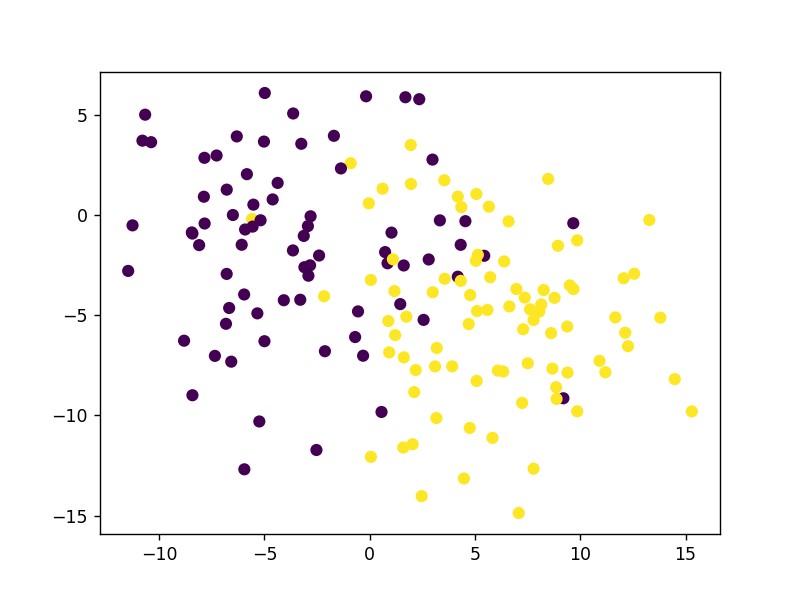

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=4.5, random_state=240, shuffle=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure()
plt.scatter(X_train.T[0], X_train.T[1], c=y_train)

### Predict

In [4]:
kNN_classifier = kNN(10)
kNN_classifier.fit(X_train, y_train)

In [5]:
y_predict = kNN_classifier.predict(X_test)

kNN_classifier.accuracy_score(y_test, y_predict)

0.85

In [6]:
kNN_classifier.predict_proba

[[0.4, 0.6],
 [0.1, 0.9],
 [0.4, 0.6],
 [0.0, 1.0],
 [0.2, 0.8],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.5, 0.5],
 [0.9, 0.1],
 [0.0, 1.0],
 [0.5, 0.5],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.4, 0.6],
 [0.1, 0.9],
 [1.0, 0.0],
 [0.9, 0.1],
 [0.9, 0.1],
 [1.0, 0.0],
 [0.4, 0.6],
 [0.8, 0.2],
 [0.7, 0.3],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.7, 0.3],
 [0.9, 0.1],
 [0.1, 0.9],
 [0.1, 0.9],
 [0.6, 0.4],
 [0.0, 1.0],
 [0.3, 0.7],
 [0.9, 0.1],
 [0.3, 0.7],
 [0.4, 0.6],
 [0.9, 0.1],
 [0.9, 0.1],
 [0.9, 0.1]]

# Scikit-learn implementation

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

neigh.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In good agreement!